In [3]:
##import some things
%matplotlib inline
import numpy as np
from quantities import kHz, ms, nA, s, uV
from neo.io import AxonIO
import matplotlib.pyplot as plt

In [4]:
def plotrawsweep(fname, mylabel, sn):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt
    
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    
    #grab sweep
    asig = block.segments[sn].analogsignals[0]
    times = asig.times.rescale('s').magnitude
    #set start time to zero
    times = times-times[0]
    #asig = asig.rescale('pA').magnitude
    plt.plot(times, asig, label=mylabel)

In [5]:
def plotsweeps(fname, mylabel, rawbg, submean):
    import numpy as np
    from quantities import kHz, ms, nA, s, uV
    from neo.io import AxonIO
    import matplotlib.pyplot as plt  
    
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    
    def grabsweep(bl, nsweep, sm):
        asig = bl.segments[nsweep].analogsignals[0]
        if(sm):
            ##how many timepoints to include in baseline
            baseline = 10000
            asig = asig - np.mean(asig[:baseline])
        times = asig.times.rescale('s').magnitude
        #set start time to zero
        times = times-times[0]
        #asig = asig.rescale('pA').magnitude
        plt.plot(times, asig, alpha=0.3, color='grey')
    
    if(rawbg):
        #grab sweeps
        #sweep 1
        grabsweep(block, 0, submean)
        grabsweep(block, 1, submean)
        grabsweep(block, 2, submean)

    #average 3 sweeps
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    if(submean):
        baseline = 1000
        avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]
    #print(avg)
    plt.plot(times, avg, label = mylabel)

In [6]:
date = '160120'
datef2 = '1612'

##read in the file so we can see which SAC recording we are looking at
f = open('../data/ChatCreChR2/' + date + '.m')
text = f.read()
print(text)

160120 p57 ChatCre/Chr2 mouse

Light Dissection 
50mL ACSF with: 
   20uL DNQX
   50uL AP5
   100uL LAP4
   12.5uL GABAzine

   
No orientation on the retina

Patch SACs, fill with ALexa 594, and then stim at diff dendritic locations 
455nm LED 


SAC1
7.2mohm pipette
CM = 14
Rm = 550M
Ra 67 M

%centered on soma
%000 shutter was closed
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',333);

%001
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',333);

%002
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%003 centered on soma but focused on dendrites
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%005 centered on the end of the dendrites
showSpots_notCentered('num_trials',3,'delay_time',2,'up_time',1,'down_time',7,'radius',83);

%006 centered on the end of the dendrites hp = +12
%responses are not synched. first one happend

## Overview

### SAC1
mostly a loss because timing was not working correctly, so triggering didn't go properly.

### SAC2
can compare stim at soma and stim at dendrites, both focus dendrites on same focal plane at same holding potential (-60)
Trials:  
15 16

### SAC3
1. Compare CSFS to CSFD (trials 20 & 21)  

2. CSFD at diff holding potentials.  
Trials:  
21 (-60mV)  
22 (0mV)  
23 (20mV)  
24 (40mV)  
25 (-20mV)  

### SAC4
a complete loss. We only recorded once and it was already dying.

### SAC5
Compare CDFD at different holding potentials.
Trials:  
33 (40mV)  
32 (20mV)  
30 (0mV)
34 (-20mV)  
29 (-60mV)  


## Methodology Controls

### Intra-trial consistancy
Three sweeps from the same trial

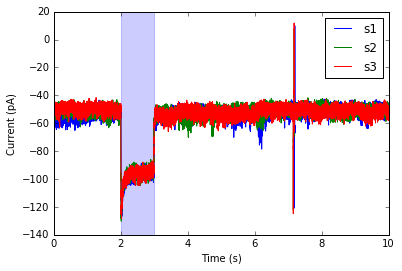

In [7]:
import matplotlib.pyplot as plt   
condition = '0020'
fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'

fig = plt.figure()
plotrawsweep(fname, mylabel = 's1', sn=0)
plotrawsweep(fname, mylabel = 's2', sn=1)
plotrawsweep(fname, mylabel = 's3', sn=2)
plt.legend()

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

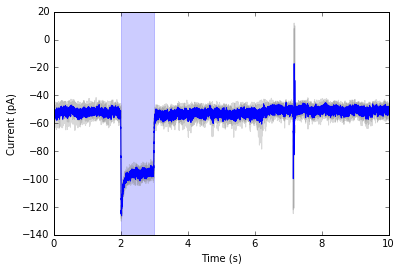

In [8]:
fig, ax = plt.subplots(1, 1)
plotsweeps(fname, mylabel = 's1',rawbg=1, submean=0)

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

## SAC2

CSFD vs CDFD - trials 15 and 16

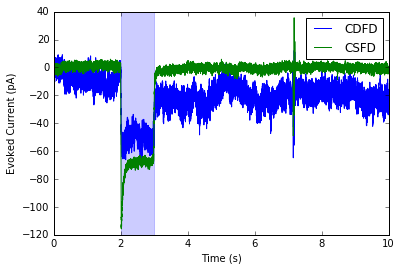

In [15]:
sac2 = np.array([['16', 'CDFD'],
                ['15', 'CSFD']])

fig = plt.figure()
for t in range(len(sac2)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac2[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac2[t,1]), rawbg=0, submean=1)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')


## SAC3

in SAC3, we can compare CSFS to CSFD (trials 20 & 21)

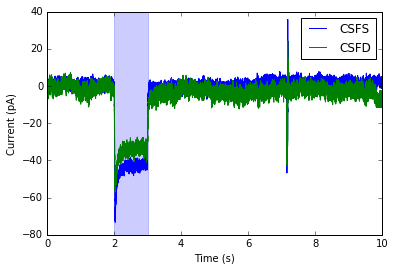

In [24]:
sac3 = np.array([[20, 'CSFS'],
                [21, 'CSFD']])

fig = plt.figure()
for t in range(len(sac3)):
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel=str(sac3[t,1]), rawbg=0, submean=1)
#plt.ylim([-300, 300]) 

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')


fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

in SAC3, we were able to record at many holding potentials for center at soma focus on dendrites. These are trials 21-25

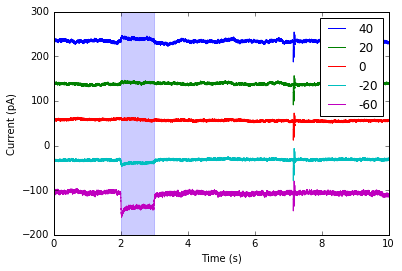

In [27]:
sac3 = np.array([[24, 40],
                [23, 20],
                [22, 0],
                [25, -20],
                [21, -60]])

fig = plt.figure()
for t in range(len(sac3)): #[21,25,22, 23, 24]
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel=str(sac3[t,1]), rawbg=0, submean=0)
#plt.ylim([-300, 300]) 

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')


fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')

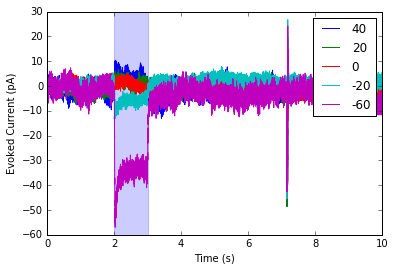

In [28]:
fig = plt.figure()
for t in range(len(sac3)): #[21,25,22, 23, 24]: 
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel=str(sac3[t,1]), rawbg=0, submean=1)
#plt.ylim([0, 2]) 

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

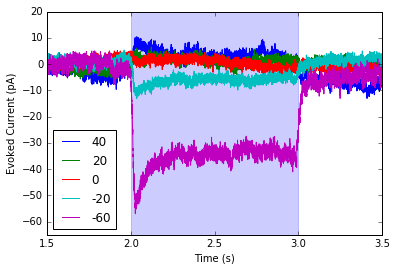

In [29]:
fig = plt.figure()
for t in range(len(sac3)): 
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac3[t,1]), rawbg=0, submean=1)
plt.xlim([1.5, 3.5]) 
plt.ylim([-65, 20])
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend(loc=3)

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

Nagel et al 2005  
<img src="./img/chriv.png">

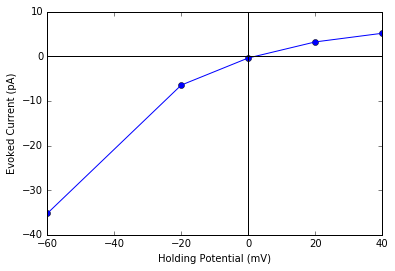

In [37]:
##plot an IV curve for sac5:

ievoked = np.zeros(len(sac3))

for t in range(len(sac3)):
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    vhold = sac3[t,1]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2./dt):int(3./dt)])
    ievoked[t] = ie
                            

plt.plot(sac3[:,1], ievoked, 'bo')
plt.plot(sac3[:,1], ievoked)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')


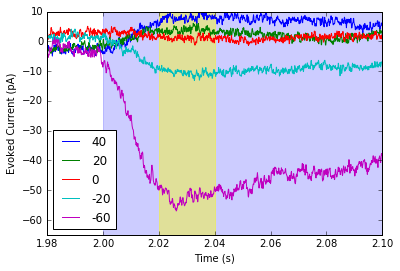

In [38]:
fig = plt.figure()
for t in range(len(sac3)):
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac3[t,1]), rawbg=0, submean=1)
plt.xlim([1.98, 2.1]) 
plt.ylim([-65, 10])

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

##show limits of evoked current
plt.axvspan(2.02, 2.04, alpha=0.4, color='yellow')

fig.show()
plt.legend(loc=3)

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

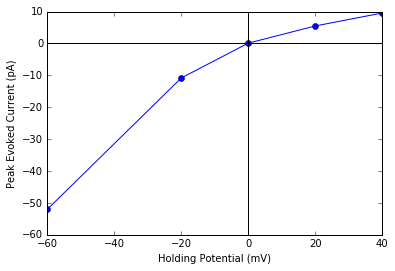

In [39]:
ievoked = np.zeros(len(sac3))

for t in range(len(sac3)):  
    condition = '00' + str(sac3[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    vhold = sac5[t,1]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2.02/dt):int(2.04/dt)])
    ievoked[t] = ie
                            

plt.plot(sac3[:,1], ievoked, 'bo')
plt.plot(sac3[:,1], ievoked)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Peak Evoked Current (pA)')

    #    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)

# SAC5
In SAC5, we were able to record CDFD at many different holding potentials.  

Trials:  
28 CS FS (-60mV)  
29 CD FD (-60mV)  
30 CD FD (0mV)   
32 CD FD (20mV)  
33 CD FD (40mV)
34 CD FD (-20mV)
35 CD FD (-60mV)

Compare same case CDFD at beginning and end of experiment

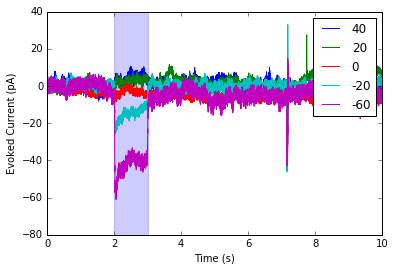

In [32]:
sac5 = np.array([[33, 40],
                [32, 20],
                [30, 0],
                [34, -20],
                [29, -60]])

fig = plt.figure()
for t in range(len(sac5)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)
    plt.label = ('test')
    
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

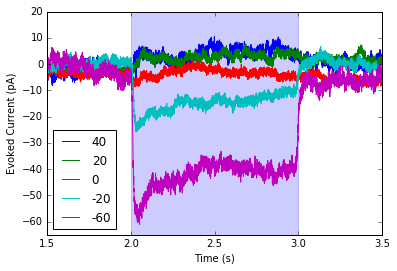

In [33]:
fig = plt.figure()
for t in range(len(sac5)):  #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)
plt.xlim([1.5, 3.5]) 
plt.ylim([-65, 20])
##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

fig.show()
plt.legend(loc=3)

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

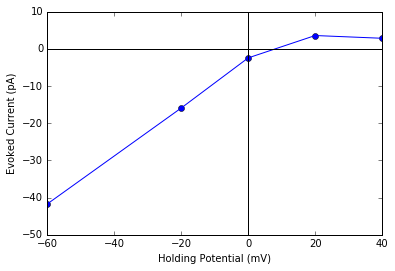

In [34]:
##plot an IV curve for sac5:

ievoked = np.zeros(len(sac5))

for t in range(len(sac5)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    vhold = sac5[t,1]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2./dt):int(3./dt)])
    ievoked[t] = ie
                            

plt.plot(sac5[:,1], ievoked, 'bo')
plt.plot(sac5[:,1], ievoked)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlabel('Holding Potential (mV)')
plt.ylabel('Evoked Current (pA)')

    #    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)

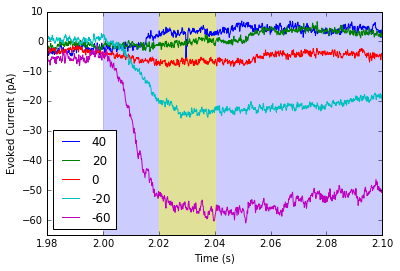

In [35]:
fig = plt.figure()
for t in range(len(sac5)):  #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)
plt.xlim([1.98, 2.1]) 
plt.ylim([-65, 10])

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')

##show limits of evoked current
plt.axvspan(2.02, 2.04, alpha=0.4, color='yellow')

fig.show()
plt.legend(loc=3)

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')

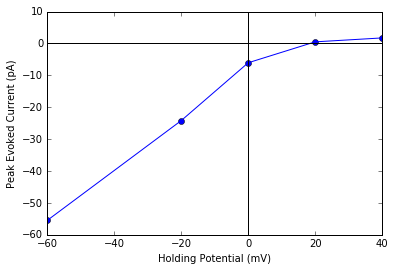

In [36]:
##plot an IV curve for sac5:

ievoked = np.zeros(len(sac5))

for t in range(len(sac5)): #[29, 34, 30, 32, 33]: 
    condition = '00' + str(sac5[t,0])
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    vhold = sac5[t,1]
    ##readin signal
    r = AxonIO(filename=fname)
    block = r.read()[0] # read the entire file > a Block
    avg = np.mean([seg.analogsignals[0] for seg in block.segments], axis=0)
    baseline = 10000
    avg = avg - np.mean(avg[:baseline])
    times = block.segments[0].analogsignals[0].times.rescale('s').magnitude
    times = times-times[0]  
    ##calculate evoked current (mean over window at 2seconds - 3seconds)
    dt = 1e-4
    ie = np.mean(avg[int(2.02/dt):int(2.04/dt)])
    ievoked[t] = ie
                            

plt.plot(sac5[:,1], ievoked, 'bo')
plt.plot(sac5[:,1], ievoked)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Holding Potential (mV)')
plt.ylabel('Peak Evoked Current (pA)')

    #    plotsweeps(fname, mylabel = str(sac5[t,1]), rawbg=0, submean=1)

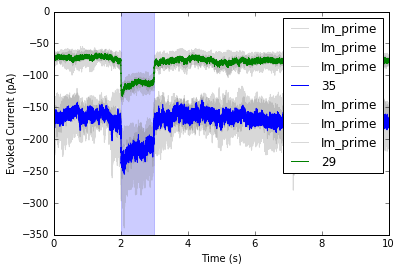

In [31]:
fig = plt.figure()
#plt.ioff()
for t in [35,29]: 
    condition = '00' + str(t)
    fname = '../data/ChatCreChR2/' + date + '/' + datef2 + condition + '.abf'
    plotsweeps(fname, mylabel = str(t), rawbg=1, submean=0)
#plt.ion()
#plt.ylim([0, 2]) 

##show limits of stimulation
plt.axvspan(2.0, 3.0, alpha=0.2, color='blue')


fig.show()
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Evoked Current (pA)')